In [28]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [29]:
# Importing the dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\niks\Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
print(df.shape)
print(df.isnull().sum())

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [56]:
X = df.values[:, [2,3,4]]

#### Clustering Concept:
Here we lookout for two things and those are BSS(between sum of squares) and WSS(within sum of squares)

The entire moto of clustering is to find internal cohesion and external cohesion

Which means we need to have a larger BSS and smaller WSS to have good internal cohesion and good external seperation respectively

This is how its done - 

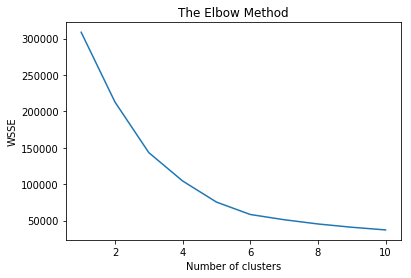

In [57]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()



The goal is to choose that no. clusters from the graph where after a certain time the WSS doesn't change drastically.

But as we know k in k means is a hyper-parameter we need to do trial and error and not completely rely on the graph.

In [58]:
print(wsse)

[308812.78, 212840.16982097185, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51118.949931647294, 45276.72614764488, 40764.24376985308, 37093.56470264091]


In [59]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    print(kmeans.inertia_)

308812.78
212840.16982097185
143342.751571706
104366.15145556198
75350.77917248776
58300.44332159069
51118.949931647294
45276.72614764488
40764.24376985308
37093.56470264091


In [60]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6,  random_state = 10)
Y_pred = kmeans.fit_predict(X)



In [61]:
Y_pred

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 2, 3, 2, 0,
       5, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [62]:
kmeans.n_iter_

8

In [63]:
df["Clusters"]=Y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


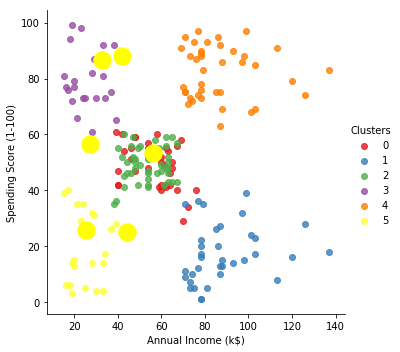

In [64]:
import seaborn as sns

sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

Now we group them into categories and name them for better understanding

In [40]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Standard",2:"Target",
                              3:"Sensible",4:"Careful"})

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,Sensible
1,2,Male,21,15,81,Careless
2,3,Female,20,16,6,Sensible
3,4,Female,23,16,77,Careless
4,5,Female,31,17,40,Sensible


In [42]:
new_df=df[df["Clusters"]=="Target"]

In [43]:
new_df.shape

(39, 6)

In [45]:
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
123,124,Male,39,69,91,Target
125,126,Female,31,70,77,Target
127,128,Male,40,71,95,Target
129,130,Male,38,71,75,Target
131,132,Male,39,71,75,Target
133,134,Female,31,72,71,Target
135,136,Female,29,73,88,Target
137,138,Male,32,73,73,Target
139,140,Female,35,74,72,Target
141,142,Male,32,75,93,Target


In [44]:
new_df.to_excel("TargetCustomers.xlsx",index=False)
# to generate new file with sensible results to forward to a client